### Import Packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Scikit learn library
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Import Accuracy Metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# Pickle To Save And Load Models
import pickle
from sklearn.externals import joblib

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Global Variables

In [4]:
# Create Global Variables If Necessay
projectName = 'Titanic Survival Prediction'
datasetPath = '/content/drive/My Drive/Data Science Projects/Titanic/Datasets/'
modelSavePath = '/content/drive/My Drive/Data Science Projects/Titanic/'

### Custom Functions

In [5]:
def plot_corr(df):
    corr=df.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Data Loading

In [6]:
df_train = pd.read_csv(datasetPath + 'train.csv')
df_test = pd.read_csv(datasetPath + 'test.csv')

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [88]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [89]:
df = pd.concat([df_train, df_test])

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


### Data Cleaning

#### Check For NaN Values In The Data Frame

In [91]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [92]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### Drop Unwanted Columns
We can see that the Cabin column has too many NaN values. Hence we can go ahead and drop this column.

In [93]:
df_train.drop(['Cabin'], axis=1, inplace=True)
df_test.drop(['Cabin'], axis=1, inplace=True)

df_train.info();
df_test.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name    

#### Filling NaN Values

* Age column can be a key column in performing Data Analysis and also during the prediction
* Hence, we can impute the Age column by filling the Nan values with the mean value of the column
* Embarked column has just 2 NaN values.
* This can be solved my filling the NaN values with the mode value of the column 


In [94]:
# Removing NaN Values From Age Column
from sklearn.impute import SimpleImputer as Im

imputerTrain = Im(missing_values = np.nan, strategy = "mean")
imputerTrain = imputerTrain.fit(df_train.iloc[:, 5:6])
df_train.iloc[:, 5:6] = imputerTrain.transform(df_train.iloc[:, 5:6])

imputerTest = Im(missing_values = np.nan, strategy = "mean")
imputerTest = imputerTest.fit(df_test.iloc[:, 4:5])
df_test.iloc[:, 4:5] = imputerTest.transform(df_test.iloc[:, 4:5])

df_train.info();
df_test.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name    

In [95]:
# Removing NaN Values From Embarked Column In Train Set
imputerTrain = Im(missing_values = np.nan, strategy = "most_frequent")
imputerTrain = imputerTrain.fit(df_train.iloc[:, 10:])
df_train.iloc[:, 10:] = imputerTrain.transform(df_train.iloc[:, 10:])

# Removing NaN Values From Embarked Column In Train Set
imputerTest = Im(missing_values = np.nan, strategy = "median")
imputerTest = imputerTest.fit(df_test.iloc[:, 8:9])
df_test.iloc[:, 8:9] = imputerTest.transform(df_test.iloc[:, 8:9])

df_train.info();
df_test.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name    

#### Correcting The Data Types Of Columns

In [ ]:
df_train['Age'] = df_train['Age'].astype(int)
df_test['Age'] = df_test['Age'].astype(int)

### Exploratory Data Analysis

#### Categorical and Ordinal Variables Distribution

* Categorical variable distribution gives us a good idea of how the passenger of the titanic categorized based on different aspects.

* From the column survived, we get a good idea that the number of people who survived this disaster are way less compared to the number of people who did not.

* From the Passenger Class perspective, majority of the pasengers were from the 3rd class followed by 1st class and 2nd class.

* From the Sex column, we can see that number of male passengers were greater than the number of female passengers.

* From the Parch (Parent or Children) and SibSp (Siblings or Spouse) column, we get a good idea that majority of the people traveled alone rather than with their families. Both of these column try to convey the same message regarding the family. We can combine these columns later for simplicity.

* Finally from the embarked column, we can clearly see that majority of the passengers embarked from S or Southampton followed by C (Cherbourg) and Q (Queenstown).

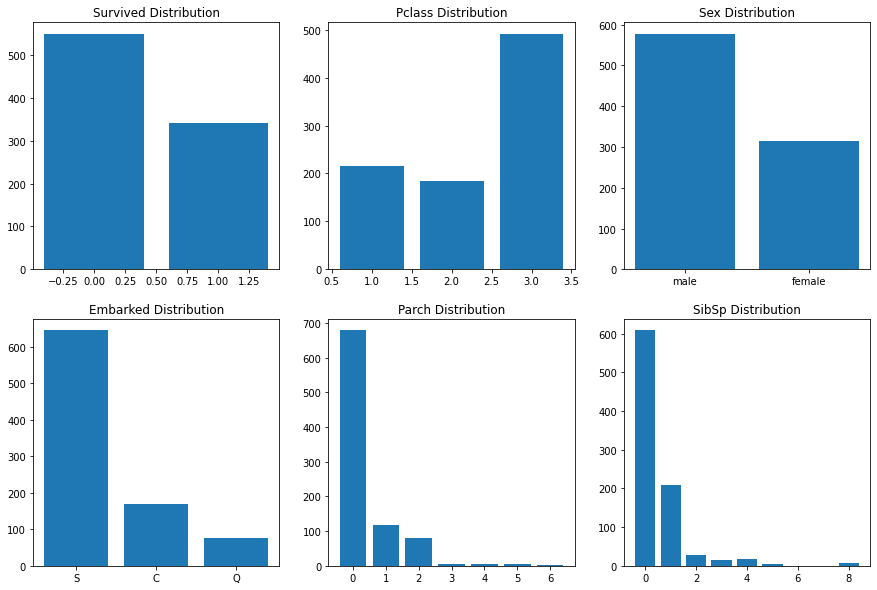

In [25]:
fig, ax = plt.subplots(2,3, figsize = (15,10))

dfTrainSurvived = df_train['Survived'].value_counts()
ax[0,0].bar(dfTrainSurvived.index, dfTrainSurvived.values)
ax[0,0].set_title('Survived Distribution')

dfTrainPclass = df_train['Pclass'].value_counts()
ax[0,1].bar(dfTrainPclass.index, dfTrainPclass.values)
ax[0,1].set_title('Pclass Distribution')

dfTrainSex = df_train['Sex'].value_counts()
ax[0,2].bar(dfTrainSex.index, dfTrainSex.values)
ax[0,2].set_title('Sex Distribution')

dfTrainEmbarked = df_train['Embarked'].value_counts()
ax[1,0].bar(dfTrainEmbarked.index, dfTrainEmbarked.values)
ax[1,0].set_title('Embarked Distribution')

dfTrainParch = df_train['Parch'].value_counts()
ax[1,1].bar(dfTrainParch.index, dfTrainParch.values)
ax[1,1].set_title('Parch Distribution')

dfTrainSibSp = df_train['SibSp'].value_counts()
ax[1,2].bar(dfTrainSibSp.index, dfTrainSibSp.values)
ax[1,2].set_title('SibSp Distribution')

plt.show()

#### Age Distribution vs Sex, Pclass and Embarked

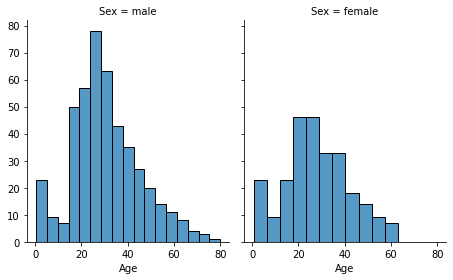

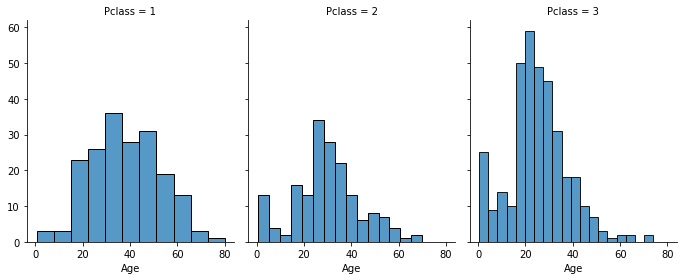

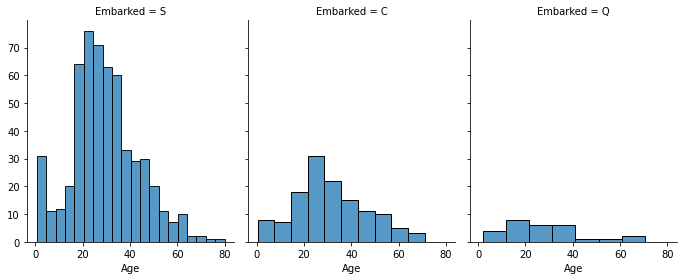

In [28]:
g_sex = sns.FacetGrid(df_train, col="Sex", height=4, aspect=.8)
g_sex.map(sns.histplot, "Age");

g_Pclass = sns.FacetGrid(df_train, col="Pclass", height=4, aspect=.8)
g_Pclass.map(sns.histplot, "Age");

g_Embarked = sns.FacetGrid(df_train, col="Embarked", height=4, aspect=.8)
g_Embarked.map(sns.histplot, "Age");

#### Survival Analysis On Each Column

Now we can dive deeper into each column and see on what basis people were saved during the disaster. A column wise survival analysis will give us a good understanding of the demographics of people who survived and did not survive.
 

In [9]:
def stackedBarChart(feature):
    survived = df_train[df_train['Survived']==1][feature].value_counts()
    dead = df_train[df_train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

##### Sex Based Survival Analysis

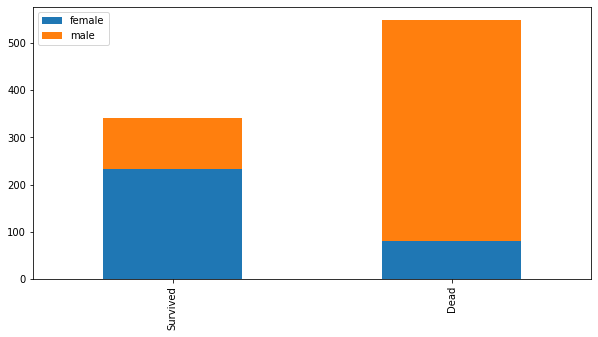

In [10]:
stackedBarChart('Sex')

We all know that the Sex of an individual played a major part in a person's chances of survival. We can clearly see from the stacked bar graph below that a larger portion of females survived and a larger portion of male did not survive. Only a small fraction of males survived.

##### Pclass Based Survival Analysis

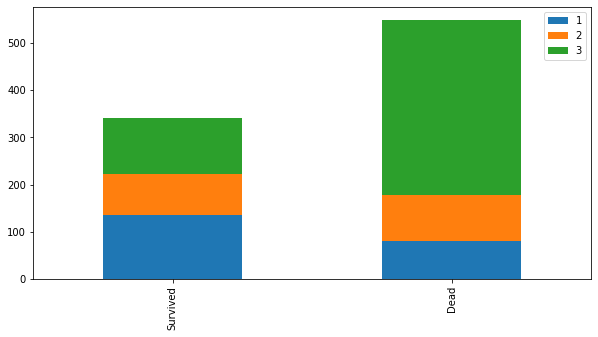

In [11]:
stackedBarChart('Pclass')

Just like Sex, the class in which the passengers traveled played a mojor role in their chance of survival. We can very clearly see here that a major portion of passengers from 1st and 2nd class survived while a huge portion of people from 3rd class could not survive. As Passenger Class played a major role on the chances of survival of a passener, we can dive a little deeper to see the association between Pclass and other columns to get a deeper insight of which passenger demographics within Pclass survived.

###### Pclass Sex Wise Survival

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


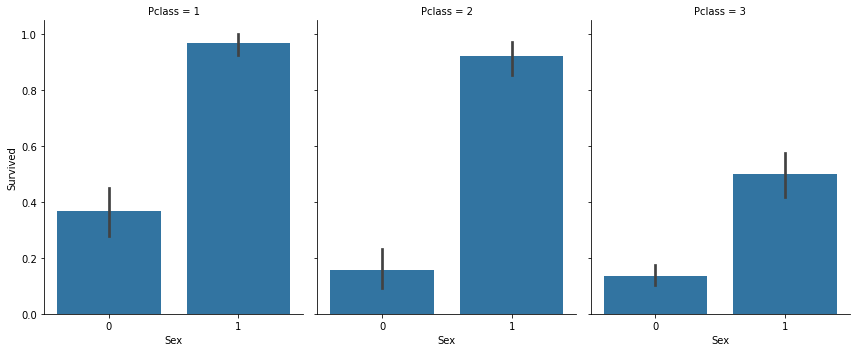

In [43]:
import seaborn as sns

g = sns.FacetGrid(df_train, col="Pclass", height=5, aspect=.8)
g.map(sns.barplot, "Sex", "Survived")

A Sex wise Passenger distribution within each class gives us a clear picture that female (1) from each class tend to survive more than men (0). But on the other hand we can also see that men from 1st class tend to have survived more than the men from 2nd or 3rd class.

###### Pclass Embarked Wise Survival

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


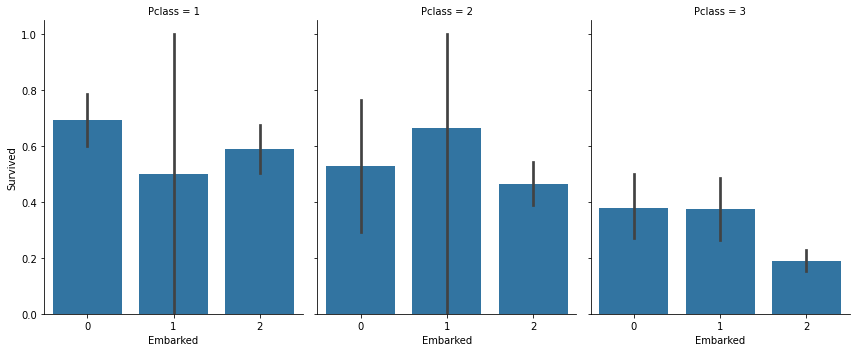

In [44]:
g = sns.FacetGrid(df_train, col="Pclass", height=5, aspect=.8)
g.map(sns.barplot, "Embarked", "Survived")

Diving deeper into the Passenger class and analysing the chances of survival based on the port of embarkemnt, we can see that the port of embarkement does not have much effect on the changes of survival. The rate or survival in each class for different port of survival shows no trend or pattern.

##### SibSp Based Survival Analysis

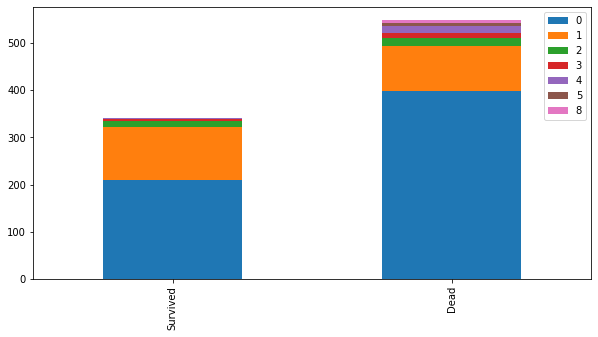

In [12]:
stackedBarChart('SibSp')

This graph gives us an interesting insight. Even though in a quick glance, we see that people who traveled alone got to survive more than the people who were with their families. But if we look closer, we can see that the ratio of people who traveled alone and survived is very less compared to the ratio of people who traveled with family and survived.

##### Parch Based Survival Analysis

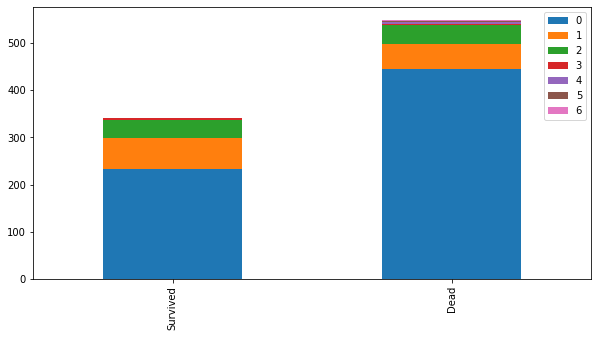

In [13]:
stackedBarChart('Parch')

The Parch column gives us a very similar insight to that of the SibSp column. Ratio of people with family tend to have survived more than those who traveled alone.

##### Embarked Based Survival Analysis

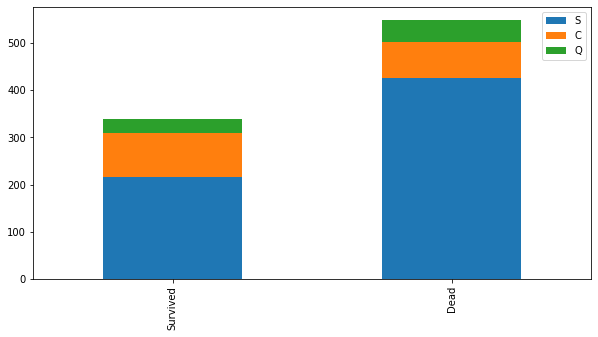

In [14]:
stackedBarChart('Embarked')

People's port of departure cannot be a factor based on which they were saved. But a plot of survival based on the port of Embarkment gives us some interesting insights. The chances of survival for a passenger who embarked from C or Q is almost 50-50 while majority of people who embarked from S did not survive.

##### Survival Distribution With Age

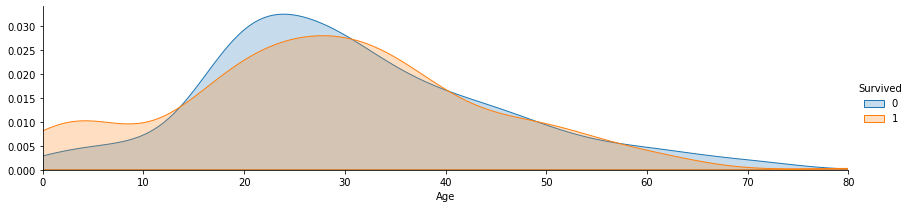

In [8]:
facet = sns.FacetGrid(df_train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df_train['Age'].max()))
facet.add_legend()
 
plt.show()

The survival distribution based on Age gives us a good insight of which age group survived more. And from the distribution we can clearly see that children below the age of 15 got to survive more than the teenagers of adults as their rate of survival is meak compared to the children.

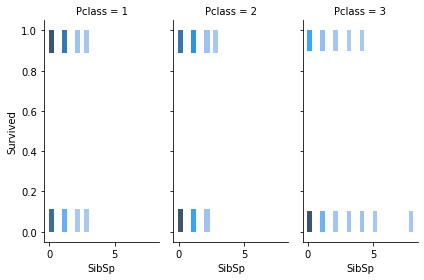

In [ ]:
g = sns.FacetGrid(df_train, col="Pclass", height=4, aspect=.5)
g.map(sns.histplot, "SibSp", "Survived")

### Feature Engineering

#### Encode Categorical Columns

Categorical Columns: Sex, Embarked 

In [97]:
# Encoding Categorical Values
df_train['Sex'] = df_train['Sex'].map( {'male': 0, 'female': 1} ).astype(int)
df_test['Sex'] = df_test['Sex'].map( {'male': 0, 'female': 1} ).astype(int)

df_train['Embarked'] = df_train['Embarked'].map( {'C':0, 'Q':1, 'S': 2} ).astype(int)
df_test['Embarked'] = df_test['Embarked'].map( {'C':0, 'Q':1, 'S': 2} ).astype(int)

In [98]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,2


In [99]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",0,34,0,0,330911,7.8292,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47,1,0,363272,7.0000,2
2,894,2,"Myles, Mr. Thomas Francis",0,62,0,0,240276,9.6875,1
3,895,3,"Wirz, Mr. Albert",0,27,0,0,315154,8.6625,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22,1,1,3101298,12.2875,2


In [100]:
# Save Cleaned Dataset
df_train.to_csv(datasetPath+'Cleaned_Train.csv', index=False)
df_test.to_csv(datasetPath+'Cleaned_Test.csv', index=False)

In [49]:
df_train = pd.read_csv(datasetPath+'Cleaned_Train.csv')
df_test = pd.read_csv(datasetPath+'Cleaned_Test.csv')

#### Extracting Data From Name Column

In [101]:
df_train['Title'] = df_train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df_test['Title'] = df_test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [102]:
df_train.info();
df_test.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int64  
 11  Title        891 non-null    object 
dtypes: float64(1), int64(8), object(3)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [103]:
df_train.Title.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Lady          1
Jonkheer      1
Don           1
Capt          1
Mme           1
Sir           1
Countess      1
Ms            1
Name: Title, dtype: int64

In [104]:
df_test.Title.value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dona        1
Dr          1
Ms          1
Name: Title, dtype: int64

In [105]:
titleMap = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3}

df_train['Title'] = df_train['Title'].map(titleMap)
df_test['Title'] = df_test['Title'].map(titleMap)

In [106]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,0,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,2,2
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,2,0


#### Categorizing Age

Let's find out the minimum and maximum age in the 'Age' column. This information will help us determine the resonable number of buckets we might need to create age group categories.

In [107]:
df_train['Age'].describe()

count    891.000000
mean      29.544332
std       13.013778
min        0.000000
25%       22.000000
50%       29.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

As we are going to modify this column lets quickly perform an analysis of age distribution against survival to see how the survial rate trends over age.

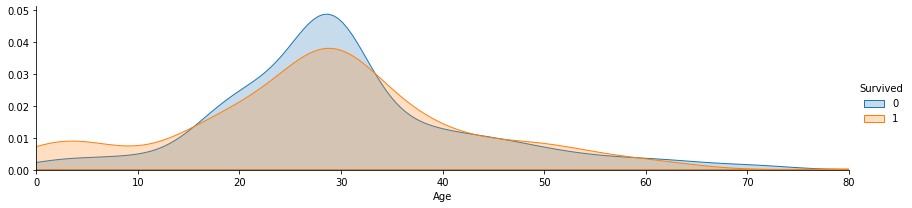

In [108]:
facet = sns.FacetGrid(df_train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df_train['Age'].max()))
facet.add_legend()
 
plt.show()

In [109]:
df_train.loc[ df_train['Age'] <= 20, 'Age'] = 0
df_train.loc[(df_train['Age'] > 20) & (df_train['Age'] <= 40), 'Age'] = 1
df_train.loc[(df_train['Age'] > 40) & (df_train['Age'] <= 60), 'Age'] = 2
df_train.loc[(df_train['Age'] > 60) & (df_train['Age'] <= 80), 'Age'] = 3

In [110]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,1,0,PC 17599,71.2833,0,2
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,1,0,113803,53.1000,2,2
4,5,0,3,"Allen, Mr. William Henry",0,1,0,0,373450,8.0500,2,0


In [111]:
df_test.loc[ df_test['Age'] <= 20, 'Age'] = 0
df_test.loc[(df_test['Age'] > 20) & (df_test['Age'] <= 40), 'Age'] = 1
df_test.loc[(df_test['Age'] > 40) & (df_test['Age'] <= 60), 'Age'] = 2
df_test.loc[(df_test['Age'] > 60) & (df_test['Age'] <= 80), 'Age'] = 3

In [112]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,892,3,"Kelly, Mr. James",0,1,0,0,330911,7.8292,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,2,1,0,363272,7.0000,2,2
2,894,2,"Myles, Mr. Thomas Francis",0,3,0,0,240276,9.6875,1,0
3,895,3,"Wirz, Mr. Albert",0,1,0,0,315154,8.6625,2,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,1,1,3101298,12.2875,2,2


#### Categorizing Fare

In [113]:
df_train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

As we are going to modify this column lets quickly perform an analysis of Fare distribution against survival to see how the survial rate trends over Fare.

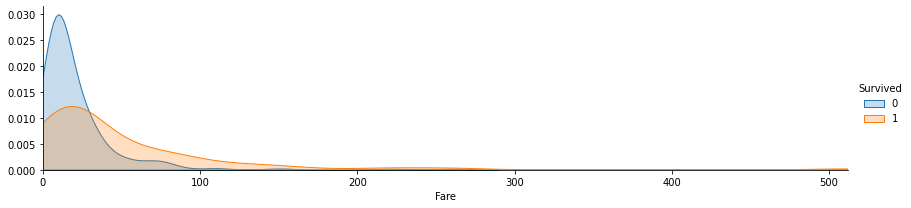

In [114]:
facet = sns.FacetGrid(df_train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, df_train['Fare'].max()))
facet.add_legend()
 
plt.show()

We can clearly see here that we majority a lot of people who paid less than 100 for the ticket. So we need to zoom in further into the range of 0 to 100 to get a clearer picture before categorization

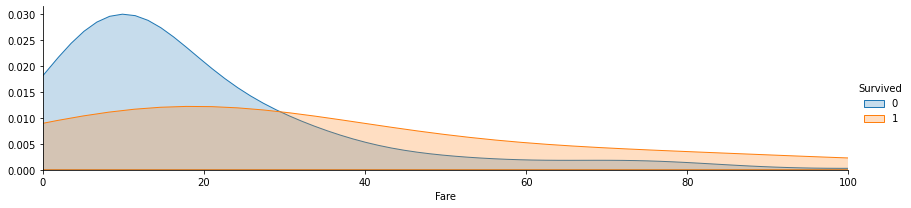

In [115]:
facet = sns.FacetGrid(df_train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, df_train['Fare'].max()))
facet.add_legend()
 
plt.xlim(0, 100)
plt.show()

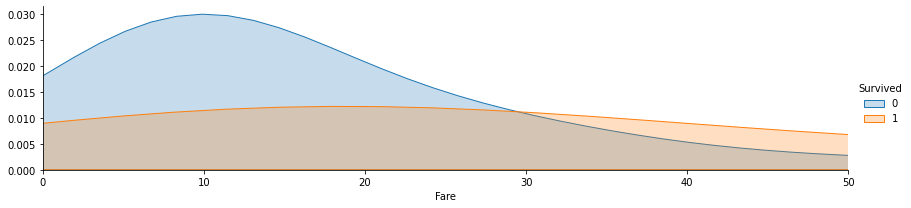

In [116]:
facet = sns.FacetGrid(df_train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, df_train['Fare'].max()))
facet.add_legend()
 
plt.xlim(0, 50)
plt.show()

In [117]:
df_train.loc[ df_train['Fare'] <= 25, 'Fare'] = 0
df_train.loc[(df_train['Fare'] > 25) & (df_train['Fare'] <= 50), 'Fare'] = 1
df_train.loc[(df_train['Fare'] > 50) & (df_train['Fare'] <= 100), 'Fare'] = 2
df_train.loc[(df_train['Fare'] > 100), 'Fare'] = 3

In [118]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,0.0,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,1,0,PC 17599,2.0,0,2
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,0.0,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,1,0,113803,2.0,2,2
4,5,0,3,"Allen, Mr. William Henry",0,1,0,0,373450,0.0,2,0


In [119]:
df_test.loc[ df_test['Fare'] <= 25, 'Fare'] = 0
df_test.loc[(df_test['Fare'] > 25) & (df_test['Fare'] <= 50), 'Fare'] = 1
df_test.loc[(df_test['Fare'] > 50) & (df_test['Fare'] <= 100), 'Fare'] = 2
df_test.loc[(df_test['Fare'] > 100), 'Fare'] = 3

In [120]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,892,3,"Kelly, Mr. James",0,1,0,0,330911,0.0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,2,1,0,363272,0.0,2,2
2,894,2,"Myles, Mr. Thomas Francis",0,3,0,0,240276,0.0,1,0
3,895,3,"Wirz, Mr. Albert",0,1,0,0,315154,0.0,2,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,1,1,3101298,0.0,2,2


#### Handling SibSp and Parch

In [121]:
df_train["FamilyCount"] = df_train["SibSp"] + df_train["Parch"] + 1
df_test["FamilyCount"] = df_test["SibSp"] + df_test["Parch"] + 1

(0.0, 11.0)

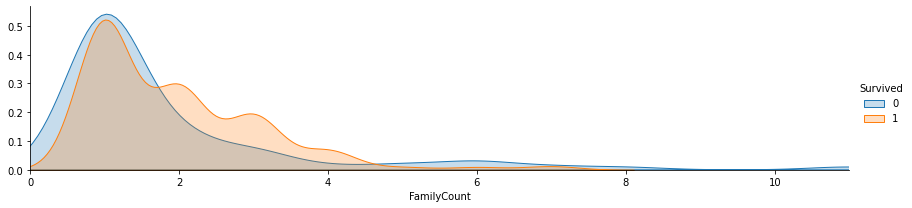

In [122]:
facet = sns.FacetGrid(df_train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilyCount',shade= True)
facet.set(xlim=(0, df_train['FamilyCount'].max()))
facet.add_legend()
plt.xlim(0)

In [123]:
familyMap = {1: 0, 2: 0.3, 3: 0.6, 4: 0.9, 5: 1.2, 6: 1.5, 7: 1.8, 8: 2.1, 9: 2.4, 10: 2.7, 11: 3}

df_train['FamilyCount'] = df_train['FamilyCount'].map(familyMap)
df_test['FamilyCount'] = df_test['FamilyCount'].map(familyMap)

In [124]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilyCount
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,0.0,2,0,0.3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,1,0,PC 17599,2.0,0,2,0.3
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,0.0,2,1,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,1,0,113803,2.0,2,2,0.3
4,5,0,3,"Allen, Mr. William Henry",0,1,0,0,373450,0.0,2,0,0.0


In [125]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilyCount
0,892,3,"Kelly, Mr. James",0,1,0,0,330911,0.0,1,0,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,2,1,0,363272,0.0,2,2,0.3
2,894,2,"Myles, Mr. Thomas Francis",0,3,0,0,240276,0.0,1,0,0.0
3,895,3,"Wirz, Mr. Albert",0,1,0,0,315154,0.0,2,0,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,1,1,3101298,0.0,2,2,0.6


#### Dropping Unwanted Columns

In [127]:
df_train.drop(['PassengerId', 'Name', 'Ticket', 'SibSp', 'Parch'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name', 'Ticket', 'SibSp', 'Parch'], axis=1, inplace=True)

In [128]:
df_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilyCount
0,0,3,0,1,0.0,2,0,0.3
1,1,1,1,1,2.0,0,2,0.3
2,1,3,1,1,0.0,2,1,0.0
3,1,1,1,1,2.0,2,2,0.3
4,0,3,0,1,0.0,2,0,0.0


In [202]:
df_test.head()

,Pclass,Sex,Age,Fare,Embarked,Title,FamilyCount
0,3,0,1,0.0,1,0,0.0
1,3,1,2,0.0,2,2,0.3
2,2,0,3,0.0,1,0,0.0
3,3,0,1,0.0,2,0,0.0
4,3,1,1,0.0,2,2,0.6


In [132]:
# Write this cleaned feature engineered data to a CSV file (Optional. Can be used as a data checkpoint)

#df_train.to_csv(datasetPath+'Cleaned_Final_Train.csv', index=False)
#df_test.to_csv(datasetPath+'Cleaned_Final_Test.csv', index=False)

#### Feature Selection Using Pearson Correlation

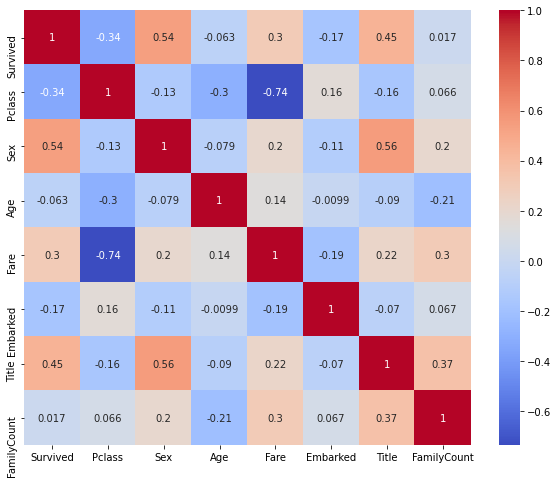

In [133]:
# Compute Pearson Correlation
cor = df_train.corr()

#Correlation with output variable
cor_target = abs(cor['Survived'])

# Plot Correlation Heatmap
plt.figure(figsize=(10,8))
#sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
sns.heatmap(cor, annot=True, cmap="coolwarm")

plt.show()

### Data Modeling

#### Create Testing and Training Data

In [135]:
# Seperate Label Column From Feature Column
df_train_label = df_train['Survived'].values
df_train.drop(['Survived'], axis=1, inplace=True)
df_train_feature = df_train.values

#### Create K-Fold Cross Validation Object

In [163]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle=False, random_state=0)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


#### KNN (82.16%)

##### Grid Search Hyperparameter Tuning

In [184]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV


k_range = list(range(2,20))
weight_options = ["uniform", "distance"]

# define parameter ranges
parameters = {'n_neighbors' : k_range, 'weights': weight_options}

# Create base model object
knnBase = KNeighborsClassifier()

# Type of scoring used to compare parameter combinations
#acc_scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(knnBase, parameters, cv = 5, scoring = 'accuracy')
grid_obj = grid_obj.fit(df_train_feature, df_train_label)

# Set the clf to the best combination of parameters
KNNModel = grid_obj.best_estimator_

# Display the best parameters
print (grid_obj.best_params_)

# Fit the best algorithm to the data. 
#KNNModel.fit(df_train_feature, df_train_label)

{'n_neighbors': 16, 'weights': 'uniform'}


##### K-Fold Cross Validation

In [185]:
scoring = 'accuracy'
score = cross_val_score(KNNModel, df_train_feature, df_train_label, cv=k_fold, n_jobs=1, scoring=scoring)
print("Scores:")
print(score)
print(f"\nAverage Score: {round(np.mean(score)*100, 2)}")

Scores:
[0.8        0.85393258 0.76404494 0.82022472 0.84269663 0.83146067
 0.80898876 0.79775281 0.85393258 0.84269663]

Average Score: 82.16


#### Decision Tree (82.15%)

##### Grid Search Hyperparameter Tuning

In [186]:
# define parameter ranges
parameters = {'min_samples_split' : range(10,500,20),'max_depth': range(1,20,2), 
              'max_features':["auto", "sqrt", "log2"]}

# Create base model object
dtBase = DecisionTreeClassifier()

# Type of scoring used to compare parameter combinations
#acc_scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(dtBase, parameters, cv = 5, scoring = 'accuracy')
grid_obj = grid_obj.fit(df_train_feature, df_train_label)

# Set the clf to the best combination of parameters
DTModel = grid_obj.best_estimator_

# Display the best parameters
print (grid_obj.best_params_)

# Fit the best algorithm to the data. 
#KNNModel.fit(df_train_feature, df_train_label)

{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 30}


##### K-Fold Cross Validation

In [187]:
scoring = 'accuracy'
score = cross_val_score(DTModel, df_train_feature, df_train_label, cv=k_fold, n_jobs=1, scoring=scoring)
print("Scores:")
print(score)
print(f"\nAverage Score: {round(np.mean(score)*100, 2)}")

Scores:
[0.82222222 0.83146067 0.78651685 0.84269663 0.83146067 0.79775281
 0.80898876 0.79775281 0.87640449 0.82022472]

Average Score: 82.15


#### SVM (82.72%)

##### Grid Search Hyperparameter Tuning

In [197]:
# define parameter ranges
parameters = {'kernel':('linear', 'rbf'), 'C':(1,0.25,0.5,0.75),
              'gamma': (1,2,3,'auto'),'decision_function_shape':('ovo','ovr'),
              'shrinking':(True,False)}

# Create base model object
svmBase = svm.SVC()

# Type of scoring used to compare parameter combinations
#acc_scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(svmBase, parameters, cv = 5, scoring = 'accuracy')
grid_obj = grid_obj.fit(df_train_feature, df_train_label)

# Set the clf to the best combination of parameters
SVMModel = grid_obj.best_estimator_

# Display the best parameters
print (grid_obj.best_params_)

# Fit the best algorithm to the data. 
#KNNModel.fit(df_train_feature, df_train_label)

{'C': 0.5, 'decision_function_shape': 'ovo', 'gamma': 'auto', 'kernel': 'rbf', 'shrinking': True}


##### K-Fold Cross Validation

In [199]:
scoring = 'accuracy'
score = cross_val_score(SVMModel, df_train_feature, df_train_label, cv=k_fold, n_jobs=1, scoring=scoring)
print("Scores:")
print(score)
print(f"\nAverage Score: {round(np.mean(score)*100, 2)}")

Scores:
[0.81111111 0.87640449 0.7752809  0.87640449 0.80898876 0.80898876
 0.79775281 0.80898876 0.88764045 0.82022472]

Average Score: 82.72


#### Random Forest (82.38%)

##### Grid Search Hyperparameter Tuning

In [194]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV


# Choose some parameter combinations to try
parameters = {'n_estimators': [4, 6, 9], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

# Choose the type of classifier. 
rfBase = RandomForestClassifier()

# Type of scoring used to compare parameter combinations
#acc_scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(rfBase, parameters, scoring='accuracy')
grid_obj = grid_obj.fit(df_train_feature, df_train_label)

# Set the clf to the best combination of parameters
RFModel = grid_obj.best_estimator_

# Display the best parameters
print (grid_obj.best_params_)

# Fit the best algorithm to the data. 
#clf.fit(df_train_feature, df_train_label)

{'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 9}


##### K-Fold Cross Validation

In [195]:
#model = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(RFModel, df_train_feature, df_train_label, cv=k_fold, n_jobs=1, scoring=scoring)
print("Scores:")
print(score)
print(f"\nAverage Score: {round(np.mean(score)*100, 2)}")

Scores:
[0.77777778 0.86516854 0.7752809  0.84269663 0.80898876 0.84269663
 0.80898876 0.78651685 0.86516854 0.86516854]

Average Score: 82.38


#### Gradient Boost

##### Grid Search Hyperparameter Tuning

In [ ]:
# define parameter ranges
parameters = {"loss":["deviance"],
              "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
              "min_samples_split": np.linspace(0.1, 0.5, 12),
              "min_samples_leaf": np.linspace(0.1, 0.5, 12),
              "max_depth":[3,5,8],
              "max_features":["log2","sqrt"],
              "criterion": ["friedman_mse",  "mae"],
              "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
              "n_estimators":[10]
              }

# Create base model object
gbmBase = GradientBoostingClassifier()

# Type of scoring used to compare parameter combinations
#acc_scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(gbmBase, parameters, cv = 5, scoring = 'accuracy')
grid_obj = grid_obj.fit(df_train_feature, df_train_label)

# Set the clf to the best combination of parameters
GBModel = grid_obj.best_estimator_

# Display the best parameters
print (grid_obj.best_params_)

# Fit the best algorithm to the data. 
#KNNModel.fit(df_train_feature, df_train_label)

##### K-Fold Cross Validation

In [ ]:
scoring = 'accuracy'
score = cross_val_score(GBModel, df_train_feature, df_train_label, cv=k_fold, n_jobs=1, scoring=scoring)
print("Scores:")
print(score)
print(f"\nAverage Score: {round(np.mean(score)*100, 2)}")

Scores:
[0.82222222 0.83146067 0.78651685 0.84269663 0.83146067 0.79775281
 0.80898876 0.79775281 0.87640449 0.82022472]

Average Score: 82.15


### Final Model

From our analysis, we can see that SVM seems to be giving us the best results with 82.72% accuracy. So lets use SVM to predict out validation set and plot the results to evaluate it.

In [200]:
predictions = SVMModel.predict(df_train_feature)
print(accuracy_score(df_train_label, predictions))

0.8316498316498316


### Save Model

In [201]:
# Save The Models Performing Well As A Pickle String. 
save_SVMModel = pickle.dumps(SVMModel)

# Save The Pickle Model In A File 
joblib.dump(save_SVMModel, modelSavePath + projectName + '_SVMModel.pkl')

['/content/drive/My Drive/Data Science Projects/Titanic/Titanic Survival Prediction_SVMModel.pkl']

### Test Dataframe Predictions

In [203]:
# Load the pickled model 
#SVMModel = joblib.load(modelSavePath + projectName + '_SVMModel.pkl')
  
# Use the loaded pickled model to make predictions 
df_test['Survival Prediction'] = SVMModel.predict(df_test)

In [204]:
df_test.head()

,Pclass,Sex,Age,Fare,Embarked,Title,FamilyCount,Survival Prediction
0,3,0,1,0.0,1,0,0.0,0
1,3,1,2,0.0,2,2,0.3,1
2,2,0,3,0.0,1,0,0.0,0
3,3,0,1,0.0,2,0,0.0,0
4,3,1,1,0.0,2,2,0.6,1


### Final Dataframe For Kaggle Submission

In [205]:
testDf = pd.read_csv(datasetPath + 'test.csv')

In [208]:
submission = pd.DataFrame(columns=['PassengerId', 'Survived'])

In [211]:
submission['PassengerId'] = testDf['PassengerId'].copy()
submission['Survived'] = df_test['Survival Prediction'].copy()

submission.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [213]:
submission.to_csv(datasetPath+'submission.csv', index=False)